## <center>Detecting the Way Face Masks Worn with YOLOv5 - PyTorch</center>

<center><img src="https://images.unsplash.com/photo-1584634731339-252c581abfc5?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=875&q=80"></center>

### Goal of This Project

This project's goal is to detect whether a person wears the face mask, if yes then whether the placement of the face mask is correct or incorrect. In this project, YOLOv5 and PyTorch have been used as object detection model and deep learning framework respectively. The classes are as follows:

* **no_mask**: The person does not wear face mask
* **correct**: The person wears the face mask properly
* **incorrect**: The person wears the face mask improperly

### Dataset
Dataset contains 293 images in total and has been collected from Google Image. Afterwards, all the images have been labeled in LabelImg as mentioned above.

## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cv2

In [2]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15002, done.
remote: Total 15002 (delta 0), reused 0 (delta 0), pack-reused 15002
Receiving objects: 100% (15002/15002), 14.02 MiB | 24.71 MiB/s, done.
Resolving deltas: 100% (10291/10291), done.


In [3]:
!cd yolov5 && pip install -r requirements.txt

## Loading the YOLOv5 Model

In [4]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-2-1 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Object Detection Example on a Random Image

In [5]:
img = "https://cdn.teyit.org/wp-content/uploads/2017/07/muslum-gursesin-tupac-ve-snoop-dogg-ile-fotografi-oldugu-iddiasi.jpg"

result = model(img)
result.print()

image 1/1: 1023x1200 4 persons, 2 ties
Speed: 204.8ms pre-process, 28.2ms inference, 28.4ms NMS per image at shape (1, 3, 576, 640)


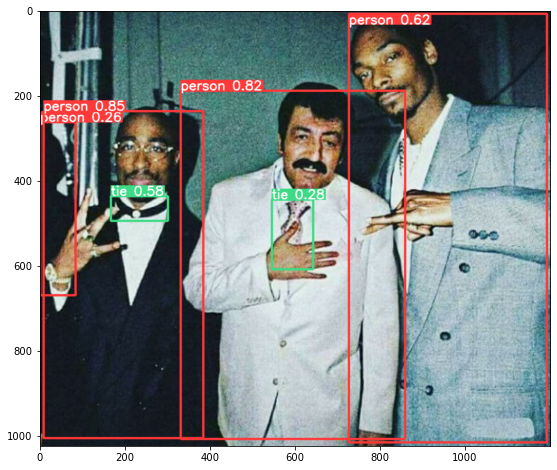

In [6]:
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(np.squeeze(result.render()))
plt.show()

## Fine-Tuning the Model

The YAML file named "dataset.yml" which shows the path to train, validation and test images is copied inside the "yolov5" folder.

In [7]:
!cp "/kaggle/input/yamlfordataset/dataset.yml" "/kaggle/working/yolov5"

Fine-Tuning the YOLOv5 model:

In [8]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 2

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, wei

## Evaluating the Model

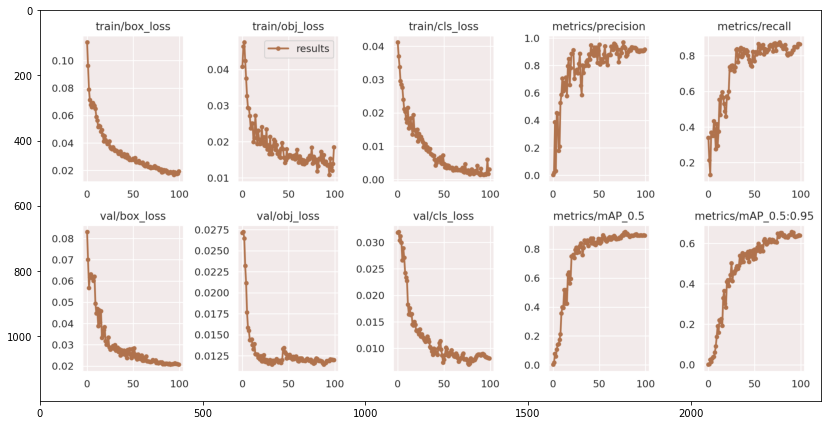

In [9]:
results = "yolov5/runs/train/exp/results.png"
results = cv2.imread(results)
plt.figure(figsize=(14, 10))
plt.imshow(results)

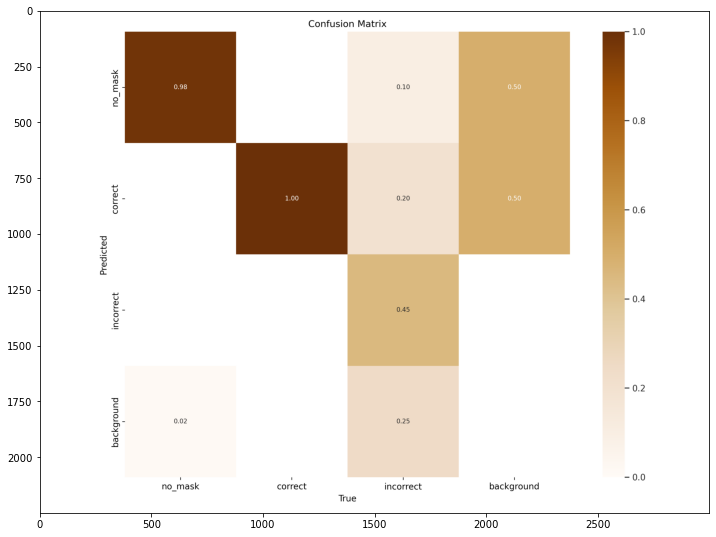

In [10]:
conf_mat = "yolov5/runs/train/exp/confusion_matrix.png"
conf_mat = cv2.imread(conf_mat)
plt.figure(figsize=(12, 10))
plt.imshow(conf_mat)

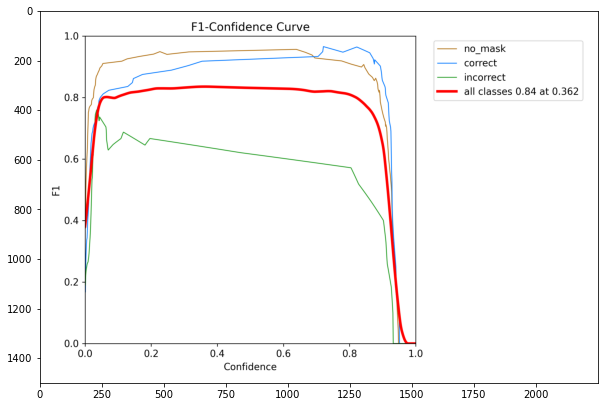

In [11]:
f1_curve = "yolov5/runs/train/exp/F1_curve.png"
f1_curve = cv2.imread(f1_curve)
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)

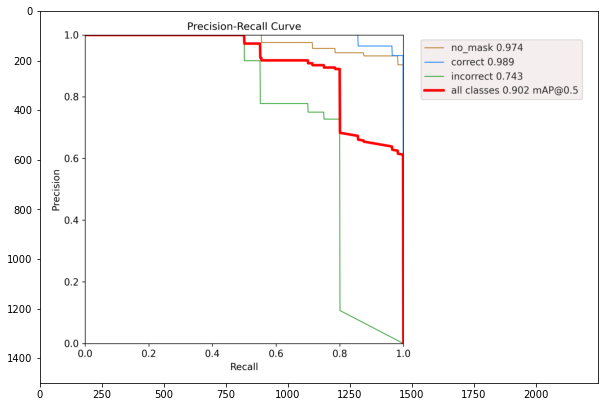

In [12]:
pr_curve = "yolov5/runs/train/exp/PR_curve.png"
pr_curve = cv2.imread(pr_curve)
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)

After training and validating the model, the model fine-tuned should be tested on a test set.

In [13]:
!cd yolov5 && python val.py --task test --data dataset.yml --weights runs/train/exp/weights/best.pt

val: data=dataset.yml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-72-g064365d Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /kaggle/input/masks-worn-correctlyincorrectly-dataset/data/labels
test: WARNING ⚠️ Cache directory /kaggle/input/masks-worn-correctlyincorrectly-dataset/data/labels is not writeable: [Errno 30] Read-only file system: '/kaggle/input/masks-worn-correctlyincorrectly-dataset/data/labels/test.cache.npy'
                 Class     Images  Instances          P          R      mAP50   
                   all         51         89      0.917      0.758 

## Loading the Custom Model

During the fine-tuning phase, model's best and last weights are saved. For manual testing, a custom model from PyTorch Hub is loaded with the model's best parameters.

In [14]:
model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/runs/train/exp/weights/best.pt", force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-2-1 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


## Manual Testing

For manual testing, images that are not included in train, val or test sets have been chosen. Model's predictions and confidences can be observed below:

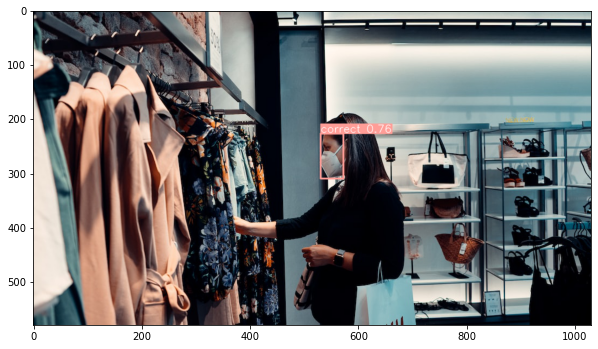

In [23]:
sample1 = "https://images.unsplash.com/photo-1591085686350-798c0f9faa7f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1031&q=80"
result = model(sample1)

plt.figure(figsize=(10,8))
plt.imshow(np.squeeze(result.render()))
plt.show()

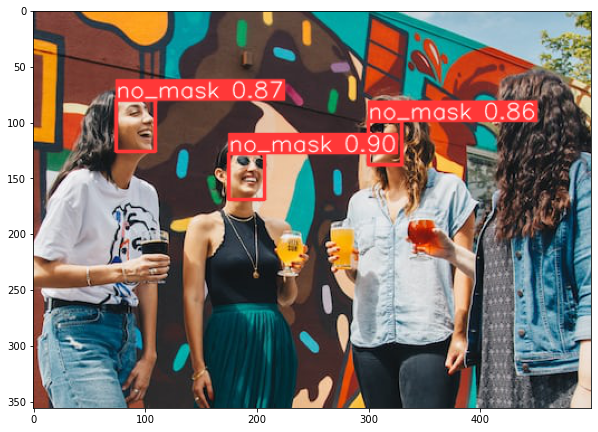

In [20]:
sample2 = "https://images.unsplash.com/photo-1532635241-17e820acc59f?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTR8fHBlb3BsZXxlbnwwfHwwfHw%3D&auto=format&fit=crop&w=500&q=60"
result = model(sample2)

plt.figure(figsize=(10,8))
plt.imshow(np.squeeze(result.render()))
plt.show()

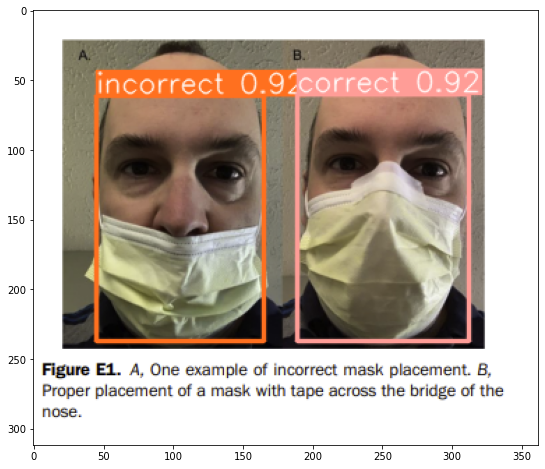

In [17]:
sample3 = "https://lh3.googleusercontent.com/FQN1-bEfRlrA1_lN8KF451WOlldwqALlLGcVKfV63gJ4qfnke6WQ5y3NesKfPbTAKMAwyHzkbNLz0uxQXNBpefWTpuWyOkBP-gsUvJQaTzipycFGZS1ehL-2YWfTfcXCz8t2PLdF"
result = model(sample3)

plt.figure(figsize=(10,8))
plt.imshow(np.squeeze(result.render()))
plt.show()

## Real Time Detection with OpenCV

Along with model's predicting on image or video data, real time detection can be carried out via a webcam by making use of the OpenCV library. But, pay attention: virtual environment providers such as Kaggle and Google Colab are not able to access to your webcam. So, if real time detection is needed it should be done on a local level such as Jupyter Notebook on one's own machine. The neccesary code for this task can be seen at the code cell below.

In [18]:
#cap = cv2.VideoCapture(0)
#while cap.isOpened():
#    ret, frame = cap.read()
#    results = model(frame)
#    cv2.imshow('Object Detection', np.squeeze(results.render()))

#    if cv2.waitKey(10) & 0xFF == ord('q'):
#        break
#cap.release()
#cv2.destroyAllWindows()

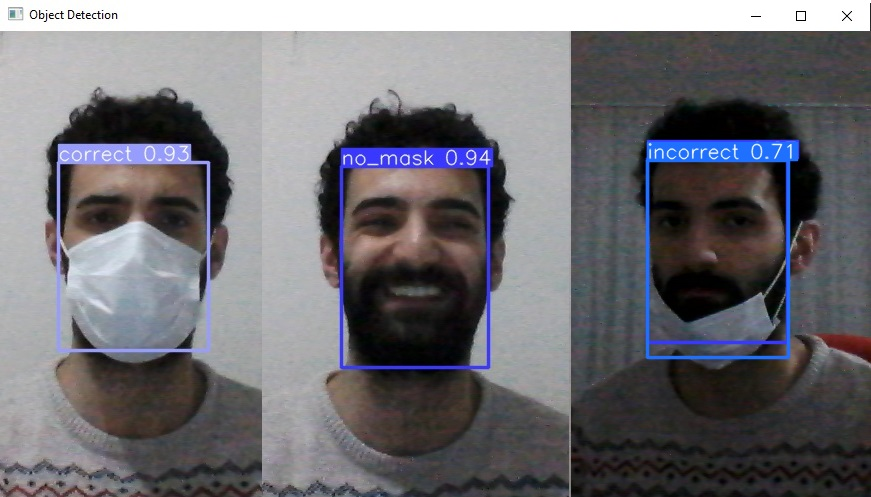

## Conclusion

The model created is working well enough to achieve the goal on a basic level because the size of the dataset is relatively small. The results obtained from statistical metrics are satisfactory but model can be improved by collecting more instances.

### <center>I want to express my thankful feelings to the readers of this notebook. Since preparing notebooks takes a great deal of time, please do not forget to give an upvote if you liked the work. Peace out 😷✌️</center>